# Setup

In [2]:
import os
import sys
# Define the path to the project root directory (one level above `src`)
project_root_path = "/Users/cmazzoleni/Documents/GitHub/CuboidAbstractionViaSeg"

# Add the src directory to sys.path
sys.path.append(os.path.join(project_root_path))

# Verify that src is in sys.path
print(sys.path)

['/opt/anaconda3/envs/myenv/lib/python311.zip', '/opt/anaconda3/envs/myenv/lib/python3.11', '/opt/anaconda3/envs/myenv/lib/python3.11/lib-dynload', '', '/opt/anaconda3/envs/myenv/lib/python3.11/site-packages', '/Users/cmazzoleni/Documents/GitHub/Hierarchical-Localization/Hierarchical-Localization/Hierarchical-Localization', '/Users/cmazzoleni/Documents/GitHub/CuboidAbstractionViaSeg']


In [3]:
import os
import argparse
from src.utils.dataset_utils import create_directory
from src.visualizers.Open3dVisualizer import Open3DVisualizer
from src.utils.json_utils import load_cuboid_data
from src.utils.plotting_utils import load_mesh_data, load_pointcloud_data
from src.scripts.preprocessing_data.data_to_6views_utils import process_file
import numpy as np
from PIL import Image


# Depth Etimation - depth anything

In [ ]:
from transformers import pipeline
from PIL import Image

pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")
image = Image.open('/Users/cmazzoleni/Documents/GitHub/CuboidAbstractionViaSeg/data/processed/chair_6views/1a8bbf2994788e2743e99e0cae970928_view_back.png')
depth = pipe(image)["depth"]

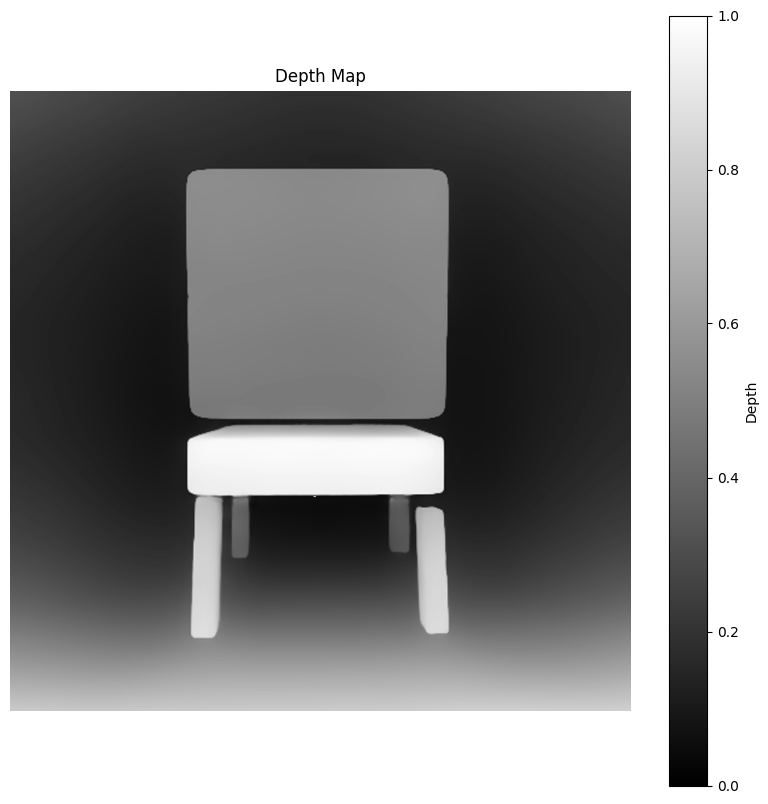

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Convert the depth map to a numpy array for visualization
depth_np = np.array(depth)

# Normalize the depth map for better visualization
depth_np_normalized = (depth_np - np.min(depth_np)) / (np.max(depth_np) - np.min(depth_np))

# Display the depth map using matplotlib
plt.figure(figsize=(10, 10))
#black color map
plt.imshow(depth_np_normalized, cmap='gray')
plt.colorbar(label='Depth')
plt.title("Depth Map")
plt.axis('off')
plt.show()

# Depth Etimation - marigold

In [1]:
import diffusers
import torch

pipe = diffusers.MarigoldDepthPipeline.from_pretrained(
    "prs-eth/marigold-depth-lcm-v1-0", variant="fp16", torch_dtype=torch.float16
).to("cuda")

image = diffusers.utils.load_image("https://marigoldmonodepth.github.io/images/einstein.jpg")
depth = pipe(image)

vis = pipe.image_processor.visualize_depth(depth.prediction)
vis[0].save("einstein_depth.png")

depth_16bit = pipe.image_processor.export_depth_to_16bit_png(depth.prediction)
depth_16bit[0].save("einstein_depth_16bit.png")

/cluster/work/riner/users/cmazzoleni/Marigold/venv/multi_diffusion/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 5/5 [00:15<00:00,  3.02s/it]
Potentially unsupported `prediction_type='None'`; values supported by the pipeline: ('depth', 'disparity').
Marigold predictions...: 100%|██████████| 1/1 [00:07<00:00,  7.56s/it]


# Depth Etimation - o3d

In [4]:
file_path = "//Users/cmazzoleni/Documents/GitHub/CuboidAbstractionViaSeg/data/raw/03001627/1a8bbf2994788e2743e99e0cae970928/models/model_normalized.obj"
output_path = "/Users/cmazzoleni/Documents/GitHub/CuboidAbstractionViaSeg/data/processed/03001627/1a8bbf2994788e2743e99e0cae970928/6views"
folder = "hello"
create_directory(output_path)
visualizer = Open3DVisualizer()
process_file(file_path, '.obj', output_path, folder, visualizer, save_depth=True)

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
Loading mesh data...
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
Mesh data loaded successfully.
True
Saved depth image to /Users/cmazzoleni/Documents/GitHub/CuboidAbstractionViaSeg/data/processed/03001627/1a8bbf2994788e2743e99e0cae970928/6views/hello_depth_top.png
Saved depth image to /Users/cmazzoleni/Documents/GitHub/CuboidAbstractionViaSeg/data/processed/03001627/1a8bbf2994788e2743e99e0cae970928/6views/hello_depth_bottom.png
Saved depth image to /Users/cmazzoleni/Documents/GitHub/CuboidAbstractionViaSeg/data/processed/03001627/1a8bbf2994788e2743e99e0cae970928/6views/hello_depth_left.png
Saved depth image to /Users/cmazzoleni/Documents/GitHub/CuboidAbstractionViaSeg/data/processed/03001627/1a8bbf2994788e2743e99e0cae970928/6views/hello_depth_right.png
Saved depth image to /Users/cmazzoleni/Documents/GitHub/CuboidA

## Depth Visualization - o3d

In [5]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
# Load the depth image
depth_image_path = "/Users/cmazzoleni/Documents/GitHub/CuboidAbstractionViaSeg/data/processed/chair_cuboid_6views_depth/e5a65fb8c660ef96dbbc9440457e303e_depth_bottom.png"
depth_image = o3d.io.read_image(depth_image_path)

# Convert the depth image to a NumPy array
depth_array = np.asarray(depth_image)

# Optionally, you can normalize the depth values for visualization
depth_normalized = (depth_array - depth_array.min()) / (depth_array.max() - depth_array.min())
#show the depth image wihtout grid
# Visualize the normalized depth image without title, axis, or labels

#create a figure with the same dimesnions as the image
depth_normalized_image = Image.fromarray((depth_normalized * 255).astype(np.uint8))
depth_normalized_image.show()
#save the image
depth_normalized_image.save("image.png")

: 